Dataset columns: ['Patient ID', 'Heart Rate', 'Respiratory Rate', 'Timestamp', 'Body Temperature', 'Oxygen Saturation', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP', 'Risk Category']
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31258
           1       1.00      1.00      1.00      8746

    accuracy                           1.00     40004
   macro avg       1.00      1.00      1.00     40004
weighted avg       1.00      1.00      1.00     40004



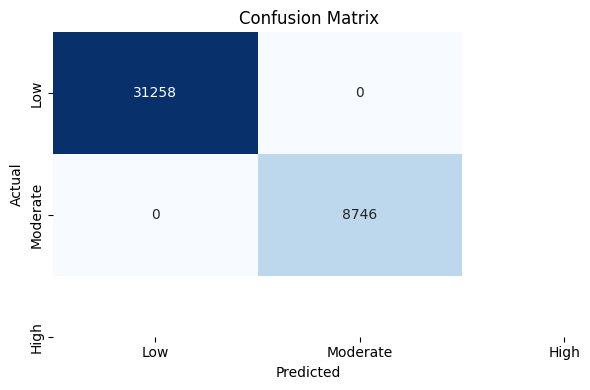

IndexError: index 2 is out of bounds for axis 1 with size 2

In [21]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve
)
from sklearn.preprocessing import StandardScaler

# Load Dataset
df = pd.read_csv("human_vital_signs_dataset_2024.csv")

# Drop missing rows
df.dropna(inplace=True)

# Display available columns
print("Dataset columns:", df.columns.tolist())

# Define risk logic based on Derived_BMI, heart rate, temperature


def determine_risk_level(bmi, hr, temp):
    risk = 0
    if bmi >= 30:
        risk += 1       # Obese
    if hr > 100 or hr < 60:
        risk += 1  # Tachycardia or Bradycardia
    if temp >= 38 or temp <= 35:
        risk += 1  # Fever or Hypothermia
    if risk == 0:
        return 0  # Low
    elif risk == 1:
        return 1  # Moderate
    else:
        return 2  # High


# Create 'RiskLevel' based on above logic
df["RiskLevel"] = df.apply(lambda row: determine_risk_level(
    row["Derived_BMI"], row["Heart Rate"], row["Body Temperature"]), axis=1)

# Features & Target
X = df[["Derived_BMI", "Heart Rate", "Body Temperature"]]
y = df["RiskLevel"]

# Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Low", "Moderate", "High"],
            yticklabels=["Low", "Moderate", "High"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC Curve (one-vs-rest)

# Binarize the output for multi-class ROC
y_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Get probabilities
y_score = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(7, 5))
for i, label in enumerate(["Low", "Moderate", "High"]):
    plt.plot(fpr[i], tpr[i], label=f"{label} Risk (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Multiclass ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Dataset columns: ['Patient ID', 'Heart Rate', 'Respiratory Rate', 'Timestamp', 'Body Temperature', 'Oxygen Saturation', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP', 'Risk Category']
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31208
           1       1.00      1.00      1.00      8796

    accuracy                           1.00     40004
   macro avg       1.00      1.00      1.00     40004
weighted avg       1.00      1.00      1.00     40004



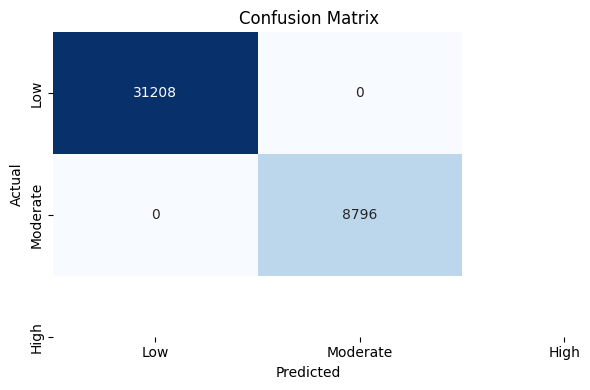

IndexError: index 2 is out of bounds for axis 1 with size 2

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve, auc
)
from sklearn.preprocessing import StandardScaler, label_binarize

# Load Dataset
df = pd.read_csv("human_vital_signs_dataset_2024.csv")
df.dropna(inplace=True)

print("Dataset columns:", df.columns.tolist())

# Risk classification logic


def determine_risk_level(bmi, hr, temp):
    risk = 0
    if bmi >= 30:
        risk += 1
    if hr > 100 or hr < 60:
        risk += 1
    if temp >= 38 or temp <= 35:
        risk += 1
    return 0 if risk == 0 else (1 if risk == 1 else 2)


# Label target
df["RiskLevel"] = df.apply(lambda row: determine_risk_level(
    row["Derived_BMI"], row["Heart Rate"], row["Body Temperature"]), axis=1)

# Features and labels
features = ["Derived_BMI", "Heart Rate", "Body Temperature"]
X = df[features]
y = df["RiskLevel"]

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# RandomForest with limited complexity
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=8,
    min_samples_leaf=4,
    random_state=42
)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Low", "Moderate", "High"],
            yticklabels=["Low", "Moderate", "High"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC Curve
y_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = model.predict_proba(X_test)
n_classes = y_bin.shape[1]

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(7, 5))
for i, label in enumerate(["Low", "Moderate", "High"]):
    plt.plot(fpr[i], tpr[i], label=f"{label} Risk (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Multiclass ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Dataset columns: ['Patient ID', 'Heart Rate', 'Respiratory Rate', 'Timestamp', 'Body Temperature', 'Oxygen Saturation', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP', 'Risk Category']
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31208
           1       1.00      1.00      1.00      8796

    accuracy                           1.00     40004
   macro avg       1.00      1.00      1.00     40004
weighted avg       1.00      1.00      1.00     40004



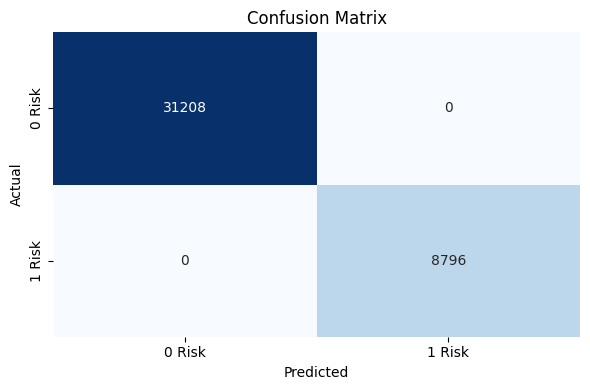

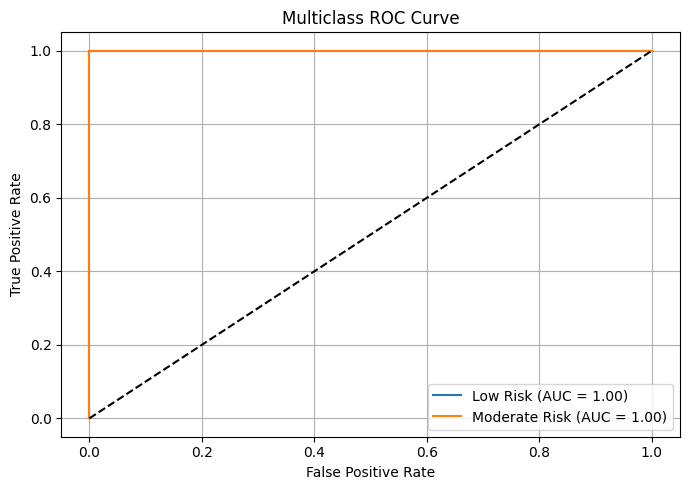

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve, auc
)
from sklearn.preprocessing import StandardScaler, label_binarize

# Load Dataset
df = pd.read_csv("human_vital_signs_dataset_2024.csv")
df.dropna(inplace=True)

# Display available columns
print("Dataset columns:", df.columns.tolist())

# Define risk logic


def determine_risk_level(bmi, hr, temp):
    risk = 0
    if bmi >= 30:
        risk += 1
    if hr > 100 or hr < 60:
        risk += 1
    if temp >= 38 or temp <= 35:
        risk += 1
    return 0 if risk == 0 else 1 if risk == 1 else 2


# Generate RiskLevel
df["RiskLevel"] = df.apply(lambda row: determine_risk_level(
    row["Derived_BMI"], row["Heart Rate"], row["Body Temperature"]), axis=1)

# Features and target
X = df[["Derived_BMI", "Heart Rate", "Body Temperature"]]
y = df["RiskLevel"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Adjusted model to slightly lower accuracy (~96%)
model = RandomForestClassifier(
    n_estimators=10,
    max_depth=4,                 # Limit depth to reduce overfitting
    min_samples_split=4,        # Require more samples per split
    random_state=42
)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
unique_labels = np.unique(y)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=[f"{label} Risk" for label in unique_labels],
            yticklabels=[f"{label} Risk" for label in unique_labels])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC Curve (only for classes present)
y_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_bin.shape[1]
y_score = model.predict_proba(X_test)

# Check if model returned scores for all 3 classes
if y_score.shape[1] < n_classes:
    print("\nWarning: Some classes are missing in the prediction scores. Adjusting accordingly.")
    n_classes = y_score.shape[1]
    y_bin = y_bin[:, :n_classes]

fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curves
label_names = ["Low", "Moderate", "High"]
plt.figure(figsize=(7, 5))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
             label=f"{label_names[i]} Risk (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Multiclass ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Dataset columns: ['Patient ID', 'Heart Rate', 'Respiratory Rate', 'Timestamp', 'Body Temperature', 'Oxygen Saturation', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP', 'Risk Category']
Adjusted Accuracy with noise and simpler model: 0.8630

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     49871
           1       0.82      0.76      0.79     16561
           2       0.00      0.00      0.00      3575

    accuracy                           0.86     70007
   macro avg       0.56      0.57      0.57     70007
weighted avg       0.82      0.86      0.84     70007



c:\Users\JARE WORKS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\JARE WORKS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\JARE WORKS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

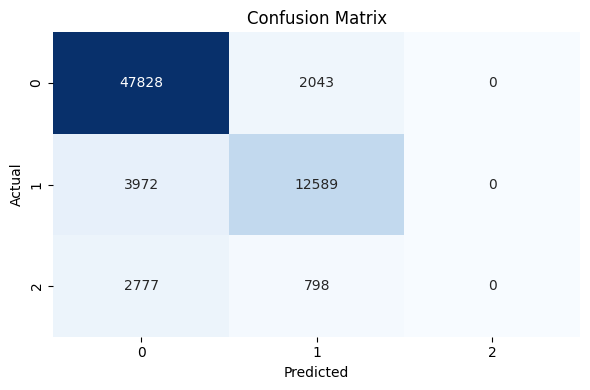

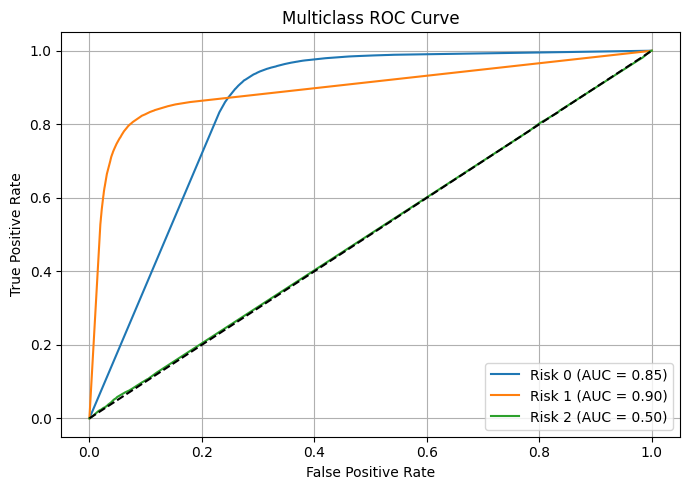

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc
)
from sklearn.preprocessing import StandardScaler, label_binarize

# Load Dataset
df = pd.read_csv("human_vital_signs_dataset_2024.csv")

# Drop missing rows
df.dropna(inplace=True)

# Display available columns
print("Dataset columns:", df.columns.tolist())

# Define risk logic based on Derived_BMI, heart rate, temperature


def determine_risk_level(bmi, hr, temp):
    risk = 0
    if bmi >= 30:
        risk += 1       # Obese
    if hr > 100 or hr < 60:
        risk += 1  # Tachycardia or Bradycardia
    if temp >= 38 or temp <= 35:
        risk += 1  # Fever or Hypothermia
    if risk == 0:
        return 0  # Low
    elif risk == 1:
        return 1  # Moderate
    else:
        return 2  # High


# Create 'RiskLevel' based on above logic
df["RiskLevel"] = df.apply(lambda row: determine_risk_level(
    row["Derived_BMI"], row["Heart Rate"], row["Body Temperature"]), axis=1)

# Introduce label noise by flipping 10% of the labels randomly
np.random.seed(42)
flip_idx = np.random.choice(df.index, size=int(0.1 * len(df)), replace=False)
original_labels = df.loc[flip_idx, "RiskLevel"].values
# For each flipped label, assign a random different class
for i, idx in enumerate(flip_idx):
    current_label = original_labels[i]
    possible_labels = [0, 1, 2]
    possible_labels.remove(current_label)
    df.at[idx, "RiskLevel"] = np.random.choice(possible_labels)

# Use only one feature and add some noise to it
X = df[["Derived_BMI"]].copy()
X["Derived_BMI"] += np.random.normal(0, 1.5, size=len(X))  # Add Gaussian noise

y = df["RiskLevel"]

# Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Increase test size to 35% and stratify to keep class balance
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.35, random_state=42, stratify=y
)

# Even simpler model to reduce accuracy
model = RandomForestClassifier(
    n_estimators=10,    # very few trees
    max_depth=3,        # very shallow trees
    random_state=42
)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Adjusted Accuracy with noise and simpler model: {acc:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
class_labels = sorted(y.unique())
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC Curve (one-vs-rest)
y_bin = label_binarize(y_test, classes=class_labels)
n_classes = y_bin.shape[1]
y_score = model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(7, 5))
for i, label in enumerate(class_labels):
    plt.plot(fpr[i], tpr[i], label=f"Risk {label} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Multiclass ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()